# Lab | Products review

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re,string
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation

In [3]:
df = pd.read_csv("./datasets/kindle_reviews_sampled.csv.zip")

In [4]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,130918,B0063LXXOA,"[0, 0]",4,I liked this story going back to visist the fi...,"01 16, 2013",A66QR0ZQ8YET8,K. Floyd,Every Second Counts,1358294400
1,464192,B00BU67NY4,"[0, 0]",5,Not your typical love story. Popsicle was beyo...,"03 19, 2013",A9I2OPQT76SPD,LUV2READ,Raunchy!!,1363651200
2,420209,B00B8ZR41E,"[1, 1]",5,I loved these and so will you. They brought al...,"04 29, 2013",A3QGO0LC8C5VFV,misty morse,Absolutely loved these stories,1367193600
3,500564,B00CG6R4ZK,"[0, 0]",5,"Very nice cozy look at the next step for the ""...","10 27, 2013",A2QSRP25LFCQ7X,"Pam ""SMB,SLT""",Great tidbit,1382832000
4,796721,B00HY03FJM,"[0, 0]",5,Oh God I cried like a freaking baby. I have no...,"03 17, 2014",A35X4ALOWRAYB4,Legit,Oh my lawd,1395014400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78610 entries, 0 to 78609
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      78610 non-null  int64 
 1   asin            78610 non-null  object
 2   helpful         78610 non-null  object
 3   overall         78610 non-null  int64 
 4   reviewText      78609 non-null  object
 5   reviewTime      78610 non-null  object
 6   reviewerID      78610 non-null  object
 7   reviewerName    78338 non-null  object
 8   summary         78600 non-null  object
 9   unixReviewTime  78610 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 6.0+ MB


In [6]:
#Delete all features except overall, reviewText and summary

In [7]:
df.isna().sum()

Unnamed: 0          0
asin                0
helpful             0
overall             0
reviewText          1
reviewTime          0
reviewerID          0
reviewerName      272
summary            10
unixReviewTime      0
dtype: int64

In [8]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,130918,B0063LXXOA,"[0, 0]",4,I liked this story going back to visist the fi...,"01 16, 2013",A66QR0ZQ8YET8,K. Floyd,Every Second Counts,1358294400
1,464192,B00BU67NY4,"[0, 0]",5,Not your typical love story. Popsicle was beyo...,"03 19, 2013",A9I2OPQT76SPD,LUV2READ,Raunchy!!,1363651200
2,420209,B00B8ZR41E,"[1, 1]",5,I loved these and so will you. They brought al...,"04 29, 2013",A3QGO0LC8C5VFV,misty morse,Absolutely loved these stories,1367193600
3,500564,B00CG6R4ZK,"[0, 0]",5,"Very nice cozy look at the next step for the ""...","10 27, 2013",A2QSRP25LFCQ7X,"Pam ""SMB,SLT""",Great tidbit,1382832000
4,796721,B00HY03FJM,"[0, 0]",5,Oh God I cried like a freaking baby. I have no...,"03 17, 2014",A35X4ALOWRAYB4,Legit,Oh my lawd,1395014400


In [9]:
#combine the reviewText and the summary features into one feature called reviewText - Be sure to add a space (' ') to seperate the two

In [10]:
df.isna().sum()

Unnamed: 0          0
asin                0
helpful             0
overall             0
reviewText          1
reviewTime          0
reviewerID          0
reviewerName      272
summary            10
unixReviewTime      0
dtype: int64

In [11]:
df['reviewText'] = df['reviewText'].fillna("")

In [12]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,130918,B0063LXXOA,"[0, 0]",4,I liked this story going back to visist the fi...,"01 16, 2013",A66QR0ZQ8YET8,K. Floyd,Every Second Counts,1358294400
1,464192,B00BU67NY4,"[0, 0]",5,Not your typical love story. Popsicle was beyo...,"03 19, 2013",A9I2OPQT76SPD,LUV2READ,Raunchy!!,1363651200
2,420209,B00B8ZR41E,"[1, 1]",5,I loved these and so will you. They brought al...,"04 29, 2013",A3QGO0LC8C5VFV,misty morse,Absolutely loved these stories,1367193600
3,500564,B00CG6R4ZK,"[0, 0]",5,"Very nice cozy look at the next step for the ""...","10 27, 2013",A2QSRP25LFCQ7X,"Pam ""SMB,SLT""",Great tidbit,1382832000
4,796721,B00HY03FJM,"[0, 0]",5,Oh God I cried like a freaking baby. I have no...,"03 17, 2014",A35X4ALOWRAYB4,Legit,Oh my lawd,1395014400


In [13]:
df.overall.value_counts()

overall
5    45947
4    20385
3     7745
2     2661
1     1872
Name: count, dtype: int64

In [14]:
def review_sentiment(rating): #This function should return 1 or 0
    # Write a the code to replace rating of 1,2,3 with 0(not good) and 4,5 with 1(good) 
    # YOUR CODE
    if rating >= 4:
        return 1
    else:
        return 0

In [15]:
#Transform the overal feature based on the review_sentiment above. Hint: Use the apply method on the Series 'overall'
df['overall'] = df['overall'].apply(review_sentiment) #YOUR CODE df.overall.apply(review_sentiment)

In [16]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,130918,B0063LXXOA,"[0, 0]",1,I liked this story going back to visist the fi...,"01 16, 2013",A66QR0ZQ8YET8,K. Floyd,Every Second Counts,1358294400
1,464192,B00BU67NY4,"[0, 0]",1,Not your typical love story. Popsicle was beyo...,"03 19, 2013",A9I2OPQT76SPD,LUV2READ,Raunchy!!,1363651200
2,420209,B00B8ZR41E,"[1, 1]",1,I loved these and so will you. They brought al...,"04 29, 2013",A3QGO0LC8C5VFV,misty morse,Absolutely loved these stories,1367193600
3,500564,B00CG6R4ZK,"[0, 0]",1,"Very nice cozy look at the next step for the ""...","10 27, 2013",A2QSRP25LFCQ7X,"Pam ""SMB,SLT""",Great tidbit,1382832000
4,796721,B00HY03FJM,"[0, 0]",1,Oh God I cried like a freaking baby. I have no...,"03 17, 2014",A35X4ALOWRAYB4,Legit,Oh my lawd,1395014400


In [17]:
df.overall.value_counts()

overall
1    66332
0    12278
Name: count, dtype: int64

In [18]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [19]:
def clean_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = i.strip().lower()
            final_text.append(word)
    return " ".join(final_text) 

In [20]:
df['reviewText'] = df['reviewText'].apply(clean_text)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df['reviewText'], df['overall'], test_size=0.2, random_state=42, stratify=df['overall'])
#Use train_test_split function and assign 80% data to the training set and 20% to the test set.
#Should you consider a stratify split? Why?
#Yes, setting "stratify=df['overall']" ensures that the class distribution is preserved in both the training and testing sets.

In [22]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,1))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (62888, 33173)
BOW_cv_test: (15722, 33173)


In [23]:
#Initialize and fit a multinomial Naive Bayes model to the training set
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Initialize the CountVectorizer
cv = CountVectorizer(min_df=0, max_df=1.0, ngram_range=(1, 1))

# Transform the training and testing data
cv_train_reviews = cv.fit_transform(x_train)
cv_test_reviews = cv.transform(x_test)

print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)

# Initialize the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Fit the model to the training data
mnb.fit(cv_train_reviews, y_train)


BOW_cv_train: (62888, 70850)
BOW_cv_test: (15722, 70850)


MultinomialNB()

In [24]:
#Return the predictions on the test set using the accuracy_score and/or other metrics of interest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
mnb_pred = mnb.predict(cv_test_reviews)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, mnb_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8842386464826358


In [25]:
#Use the classification_report function and print the result using the predicted results on the test set
# Predictions and Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate and print the classification report
report = classification_report(y_test, mnb_pred, target_names=['Not Good', 'Good'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Not Good       0.66      0.52      0.58      2456
        Good       0.91      0.95      0.93     13266

    accuracy                           0.88     15722
   macro avg       0.79      0.74      0.76     15722
weighted avg       0.88      0.88      0.88     15722



In [26]:
cm_cv = confusion_matrix(y_test,mnb_pred)
cm_cv

array([[ 1282,  1174],
       [  646, 12620]])

In [27]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

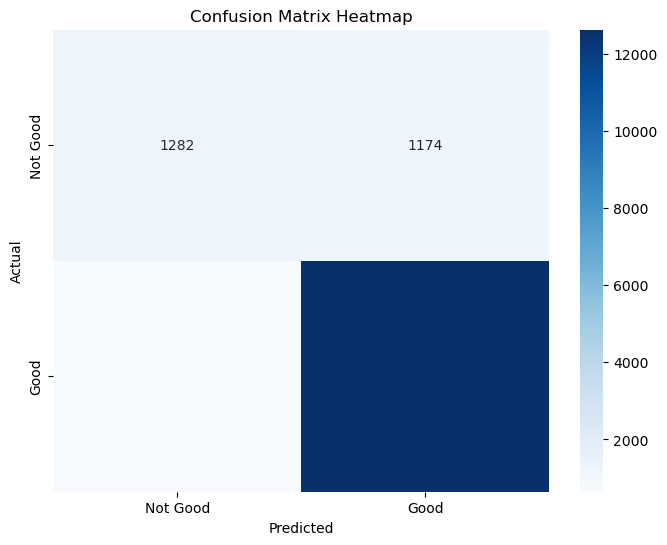

In [61]:
#Create a heat map to visualize the confusion matrix
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate the confusion matrix
cm_cv = confusion_matrix(y_test, mnb_pred)

# Convert the confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm_cv, index=['Not Good', 'Good'], columns=['Not Good', 'Good'])

# Replace NaN with zeros if any are found (as a safeguard)
cm_df.fillna(0, inplace=True)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()